# CNN Image Classifier

## Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

2025-04-10 21:15:44.025527: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744341344.039007  206772 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744341344.043006  206772 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744341344.055276  206772 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744341344.055298  206772 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744341344.055301  206772 computation_placer.cc:177] computation placer alr

## Hyperparameters

In [2]:
IMG_WIDTH, IMG_HEIGHT = 128, 128
BATCH_SIZE = 32
LEARNING_RATE = 0.00001
EPOCHS = 100

## Dataset

The used [Animal Image Dataset](https://www.kaggle.com/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals). It was split into a training and testing set at an 80 to 20 ratio using [this script](./split.ipynb)

In [3]:
dataset_dir = os.path.join('datasets', 'animals')
train_dir = os.path.join(dataset_dir, 'train')
test_dir = os.path.join(dataset_dir, 'test')

We build the image loaders. For training we also apply data augmentation through rotation, width shifting, zoom in and horizontal flipping. The images are also rescaled so taht the pixel values are between 0 and 1 instead of 0 to 255

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=10,
    width_shift_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=32,
    class_mode="binary",
)

classes = len(train_generator.class_indices)

Found 4320 images belonging to 90 classes.


## Model

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D,
    MaxPooling2D,
    Flatten,
    Dense,
    Input,
    Dropout,
    BatchNormalization,
)

model = Sequential()
model.add(
    Input(
        shape=(IMG_WIDTH, IMG_HEIGHT, 3),
    )
)

model.add(
    Conv2D(64, kernel_size=3, activation="relu", padding="same")
)
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=3, activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(256, kernel_size=3, activation="relu", padding="same"))
model.add(Conv2D(256, kernel_size=3, activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, kernel_size=3, activation="relu", padding="same"))
model.add(Conv2D(512, kernel_size=3, activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, kernel_size=3, activation="relu", padding="same"))
model.add(Conv2D(512, kernel_size=3, activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(classes, activation="softmax"))

model.summary()

I0000 00:00:1744341346.242020  206772 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4168 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    33,558,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 59,934,938 (228.63 MB)

 Trainable params: 59,931,994 (228.62 MB)

 Non-trainable params: 2,944 (11.50 KB)

In [6]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss="sparse_categorical_crossentropy",
    metrics=[
        "accuracy",
    ],
)

In [7]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        "checkpoints/animal_model_2_{epoch:02d}.keras",
        save_freq=len(train_generator) * 5, # every 5 epochs
    ),
]

In [8]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=EPOCHS,
    callbacks=callbacks,
)

/home/cajas/Archivos/tec/semestre_8/tc3002b/ml_benji/.venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100


I0000 00:00:1744341350.351507  206988 service.cc:152] XLA service 0x7d42cc01bc80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744341350.351544  206988 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2025-04-10 21:15:50.444590: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1744341350.947732  206988 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-04-10 21:15:52.200701: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3118', 12 bytes spill stores, 12 bytes spill loads

2025-04-10 21:15:52.213133: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusio

  2/135 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step - accuracy: 0.0000e+00 - loss: 6.4725 

I0000 00:00:1744341361.220914  206988 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


135/135 ━━━━━━━━━━━━━━━━━━━━ 35s 161ms/step - accuracy: 0.0107 - loss: 5.7204
Epoch 2/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 22s 165ms/step - accuracy: 0.0331 - loss: 4.7378
Epoch 3/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 22s 166ms/step - accuracy: 0.0498 - loss: 4.4210
Epoch 4/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 22s 164ms/step - accuracy: 0.0607 - loss: 4.2704
Epoch 5/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 25s 185ms/step - accuracy: 0.0837 - loss: 4.0933
Epoch 6/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 23s 173ms/step - accuracy: 0.0961 - loss: 3.9546
Epoch 7/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 23s 167ms/step - accuracy: 0.1043 - loss: 3.9053
Epoch 8/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 22s 165ms/step - accuracy: 0.1216 - loss: 3.8050
Epoch 9/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 23s 167ms/step - accuracy: 0.1447 - loss: 3.6740
Epoch 10/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 25s 186ms/step - accuracy: 0.1480 - loss: 3.6802
Epoch 11/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 23s 171ms/step - accuracy: 0.1437 - loss: 3.6056
Epoch 12/100
135/135

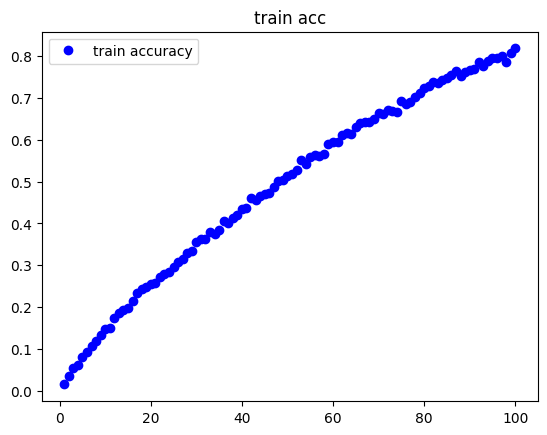

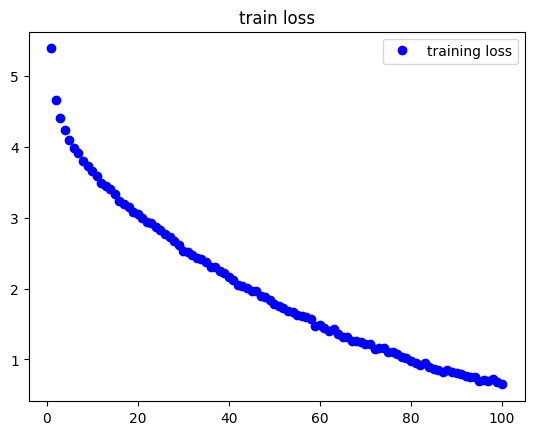

In [12]:
acc = history.history['accuracy']

loss = history.history['loss']

epochs_range = range(1, len(acc) + 1)

plt.plot(epochs_range, acc, "bo", label="train accuracy")
plt.title("train acc")
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, "bo", label="training loss")
plt.title("train loss")
plt.legend()

plt.show()

In [10]:
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False,
)

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes



Found 1080 images belonging to 90 classes.


2025-04-10 21:55:54.223922: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_226', 120 bytes spill stores, 120 bytes spill loads

2025-04-10 21:55:54.395137: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_219_0', 48 bytes spill stores, 48 bytes spill loads

2025-04-10 21:55:54.825161: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_219', 488 bytes spill stores, 488 bytes spill loads

2025-04-10 21:55:54.974164: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_219', 820 bytes spill stores, 820 bytes spill loads

2025-04-10 21:55:55.268941: I extern

33/34 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.4608 - loss: 2.6873

2025-04-10 21:56:02.245887: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_219_0', 36 bytes spill stores, 36 bytes spill loads

2025-04-10 21:56:02.607258: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_219', 476 bytes spill stores, 476 bytes spill loads

2025-04-10 21:56:02.689012: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_219', 4 bytes spill stores, 4 bytes spill loads

2025-04-10 21:56:02.758287: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_226', 100 bytes spill stores, 100 bytes spill loads

2025-04-10 21:56:02.771921: I external/l

34/34 ━━━━━━━━━━━━━━━━━━━━ 13s 233ms/step - accuracy: 0.4613 - loss: 2.6869
Test accuracy: 0.4694444537162781
Test loss: 2.679687023162842
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step


Classification Report:
                precision    recall  f1-score   support

      antelope       0.64      0.58      0.61        12
        badger       0.50      0.42      0.45        12
           bat       0.60      0.25      0.35        12
          bear       0.46      0.50      0.48        12
           bee       0.71      0.42      0.53        12
        beetle       0.70      0.58      0.64        12
         bison       0.55      0.50      0.52        12
          boar       0.14      0.17      0.15        12
     butterfly       0.40      0.83      0.54        12
           cat       0.50      0.17      0.25        12
   caterpillar       0.44      0.58      0.50        12
    chimpanzee       0.50      0.33      0.40        12
     cockroach       0.78      0.58      0.67        12
           cow       0.42      0.42      0.42        12
        coyote       0.25      0.17      0.20        12
          crab       0.45      0.42      0.43        12
          crow       0.6

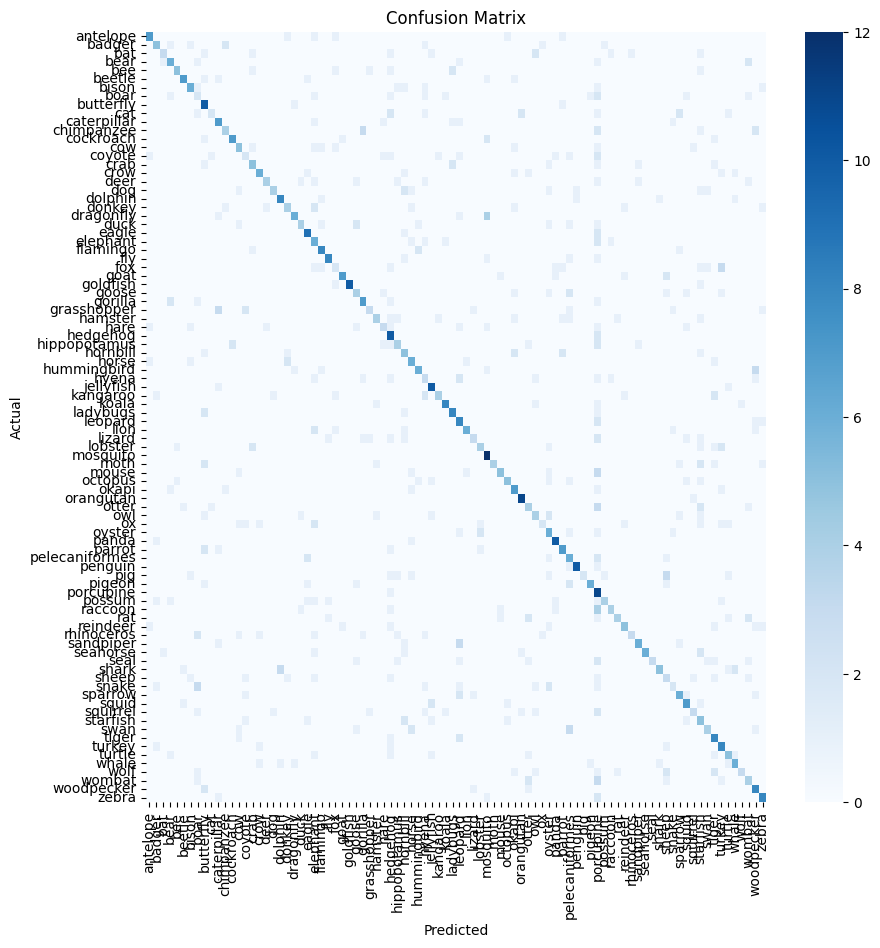

In [11]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

class_names = list(test_generator.class_indices.keys())

report = classification_report(
    y_true,
    y_pred,
    target_names=class_names,
)


conf_matrix = confusion_matrix(y_true, y_pred)

print("Classification Report:")
print(report)

plt.figure(figsize=(10, 10))
sns.heatmap(
    conf_matrix,
    # annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    # xtickrotation=45,
    yticklabels=class_names,
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
